In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
df = pd.read_csv('D:\workspace\MachineLearning\Datasets\Datasets\FMAC-HPI_24420.csv')
y = df['NSA Value']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

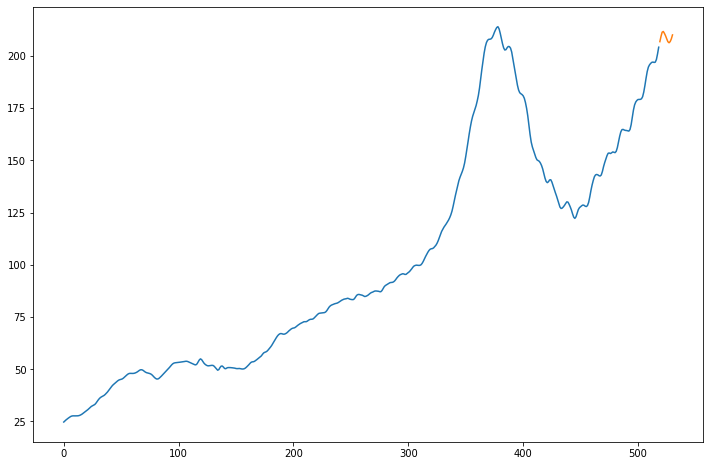

In [4]:
y_train.plot(figsize=(12,8))
y_test.plot()
plt.show()

In [5]:
alphas = np.linspace(0.01,0.9,10)
betas = np.linspace(0.01,0.9,10)
gammas = np.linspace(0.01,0.9,10)
scores = []

for i in tqdm(range(len(alphas))):
    for b in betas:
        for g in gammas:
            hw_add = ExponentialSmoothing(y_train, seasonal_periods=12,trend='add',seasonal='add')
            fit1 = hw_add.fit(smoothing_level=alphas[i], smoothing_trend=b,smoothing_seasonal=g)
            y_pred = fit1.forecast(len(y_test))
            scores.append([alphas[i], b,g,mean_squared_error(y_test,y_pred)])

 10%|█         | 1/10 [00:02<00:22,  2.55s/it]C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 20%|██        | 2/10 [00:05<00:21,  2.64s/it]C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.

In [8]:
scores_df = pd.DataFrame(scores, columns=['alpha','beta','gamma', 'score'])
scores_df.sort_values('score')

,alpha,beta,gamma,score
702,0.702222,0.010000,0.207778,7.127216e-01
802,0.801111,0.010000,0.207778,7.352629e-01
602,0.603333,0.010000,0.207778,9.962237e-01
902,0.900000,0.010000,0.207778,1.016270e+00
903,0.900000,0.010000,0.306667,1.122941e+00
...,...,...,...,...
999,0.900000,0.900000,0.900000,8.455771e+53
279,0.207778,0.702222,0.900000,1.232131e+55
899,0.801111,0.900000,0.900000,5.021238e+55
699,0.603333,0.900000,0.900000,1.416004e+59


In [9]:
alphas = np.linspace(0.01,0.9,10)
betas = np.linspace(0.01,0.9,10)
gammas = np.linspace(0.01,0.9,10)
scores = []

for i in tqdm(range(len(alphas))):
    for b in betas:
        for g in gammas:
            hw_add = ExponentialSmoothing(y_train, seasonal_periods=12,trend='add',seasonal='mul')
            fit1 = hw_add.fit(smoothing_level=alphas[i], smoothing_trend=b,smoothing_seasonal=g)
            y_pred = fit1.forecast(len(y_test))
            scores.append([alphas[i], b,g,mean_squared_error(y_test,y_pred)])

scores_df = pd.DataFrame(scores, columns=['alpha','beta','gamma', 'score'])
scores_df.sort_values('score')

 10%|█         | 1/10 [00:03<00:32,  3.58s/it]C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization faile

,alpha,beta,gamma,score
902,0.900000,0.010000,0.207778,3.718344e-01
802,0.801111,0.010000,0.207778,3.956663e-01
702,0.702222,0.010000,0.207778,4.464787e-01
602,0.603333,0.010000,0.207778,4.525129e-01
502,0.504444,0.010000,0.207778,5.058745e-01
...,...,...,...,...
993,0.900000,0.900000,0.306667,3.638423e+11
483,0.405556,0.801111,0.306667,5.486021e+11
896,0.801111,0.900000,0.603333,9.543257e+11
788,0.702222,0.801111,0.801111,1.031625e+12


In [10]:
alphas = np.linspace(0.01,0.9,10)
beta = np.linspace(0.01,0.9,10)
gammas = np.linspace(0.01,0.9,10)
phis = np.linspace(0.01,0.9,10)
scores = []

for i in tqdm(range(len(alphas))):
    for b in betas:
        for g in gammas:
            for p in phis:
                hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add', damped_trend=True)
                fit1 = hw_add.fit(smoothing_level = alphas[i], smoothing_trend=b, smoothing_seasonal=g, damping_trend=p)
                y_pred = fit1.forecast(len(y_test))
                scores.append([alphas[i],b,g,p,mean_squared_error(y_test, y_pred)])

scores_df = pd.DataFrame(scores, columns=['alpha','beta','gamma','phi', 'score'])
scores_df.sort_values('score')                

 20%|██        | 2/10 [00:51<03:28, 26.01s/it]C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization faile

,alpha,beta,gamma,phi,score
7129,0.702222,0.108889,0.207778,0.900000,2.507543e-01
2759,0.207778,0.702222,0.504444,0.900000,2.960235e-01
6728,0.603333,0.702222,0.207778,0.801111,3.447204e-01
6628,0.603333,0.603333,0.207778,0.801111,3.470480e-01
4289,0.405556,0.207778,0.801111,0.900000,3.555577e-01
...,...,...,...,...,...
2999,0.207778,0.900000,0.900000,0.900000,1.465312e+29
7999,0.702222,0.900000,0.900000,0.900000,7.656834e+34
8999,0.801111,0.900000,0.900000,0.900000,2.437550e+39
9899,0.900000,0.801111,0.900000,0.900000,1.119924e+44


In [11]:
alphas = np.linspace(0.01,0.9,10)
beta = np.linspace(0.01,0.9,10)
gammas = np.linspace(0.01,0.9,10)
phis = np.linspace(0.01,0.9,10)
scores = []

for i in tqdm(range(len(alphas))):
    for b in betas:
        for g in gammas:
            for p in phis:
                hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul', damped_trend=True)
                fit1 = hw_add.fit(smoothing_level = alphas[i], smoothing_trend=b, smoothing_seasonal=g, damping_trend=p)
                y_pred = fit1.forecast(len(y_test))
                scores.append([alphas[i],b,g,p,mean_squared_error(y_test, y_pred)])

scores_df = pd.DataFrame(scores, columns=['alpha','beta','gamma','phi', 'score'])
scores_df.sort_values('score')                

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 10%|█         | 1/10 [00:35<05:17, 35.26s/it]C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: 

,alpha,beta,gamma,phi,score
2499,0.207778,0.405556,0.900000,0.900000,3.451852e-01
2759,0.207778,0.702222,0.504444,0.900000,3.650561e-01
4389,0.405556,0.306667,0.801111,0.900000,3.760366e-01
3379,0.306667,0.306667,0.702222,0.900000,3.930517e-01
4299,0.405556,0.207778,0.900000,0.900000,3.934688e-01
...,...,...,...,...,...
9479,0.900000,0.405556,0.702222,0.900000,1.521380e+11
6799,0.603333,0.702222,0.900000,0.900000,2.723374e+11
4749,0.405556,0.702222,0.405556,0.900000,3.095676e+11
9788,0.900000,0.702222,0.801111,0.801111,2.204699e+12


In [12]:
hw_add = Holt(y_train, damped_trend=True, exponential=True)
fit1 = hw_add.fit(smoothing_level=0.9, smoothing_trend=0.9, damping_trend=0.603333, optimized=False)
y_pred = fit1.forecast(len(y_test))
np.sqrt(mean_squared_error(y_test, y_pred))

2.1419413325196324

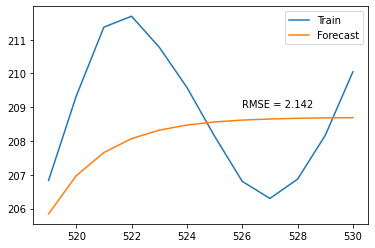

In [18]:
y_pred.index = y_test.index
plt.plot(y_test, label='Train')
plt.plot(y_pred, label='Forecast')
error = str(np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
plt.text(526, 209, "RMSE = "+error)
plt.legend()
plt.show()